In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons
from mpl_toolkits.mplot3d import Axes3D
import math
import os
import time
import itertools

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

%matplotlib notebook

plt.rcParams['figure.figsize'] = [7, 7]

<IPython.core.display.Javascript object>


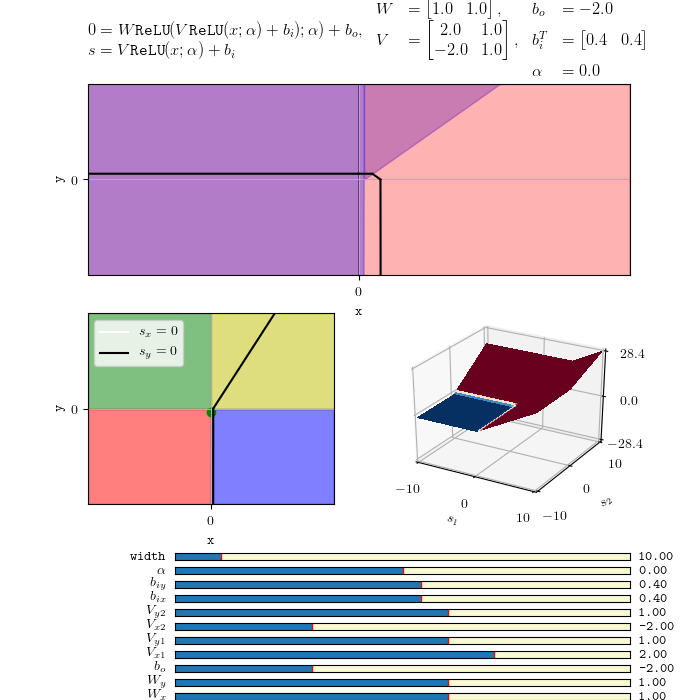

In [5]:
fig = plt.figure()
ax = fig.add_subplot(211)
#ax2 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224, projection='3d')
plt.subplots_adjust(bottom=0.28)

width = 10.0

Wx = 1.0
Wy = 1.0
bo = -2.0

Vx1 = 2.0
Vy1 = 1.0
Vx2 = -2.0
Vy2 = 1.0
bix = 0.4
biy = 0.4

alpha = 0.001

axcolor = 'lightgoldenrodyellow'

axWx = plt.axes([0.25, 0.00, 0.65, 0.01], facecolor=axcolor)
axWy = plt.axes([0.25, 0.02, 0.65, 0.01], facecolor=axcolor)
axbo = plt.axes([0.25, 0.04, 0.65, 0.01], facecolor=axcolor)
axVx1 = plt.axes([0.25, 0.06, 0.65, 0.01], facecolor=axcolor)
axVy1 = plt.axes([0.25, 0.08, 0.65, 0.01], facecolor=axcolor)
axVx2 = plt.axes([0.25, 0.10, 0.65, 0.01], facecolor=axcolor)
axVy2 = plt.axes([0.25, 0.12, 0.65, 0.01], facecolor=axcolor)
axbix = plt.axes([0.25, 0.14, 0.65, 0.01], facecolor=axcolor)
axbiy = plt.axes([0.25, 0.16, 0.65, 0.01], facecolor=axcolor)
axalpha = plt.axes([0.25, 0.18, 0.65, 0.01], facecolor=axcolor)
axwidth = plt.axes([0.25, 0.20, 0.65, 0.01], facecolor=axcolor)

WxSlid = Slider(axWx, r'$W_x$', -5.0, 5.0, valinit=Wx)
WySlid = Slider(axWy, r'$W_y$', -5.0, 5.0, valinit=Wy)
boSlid = Slider(axbo, r'$b_o$', -5.0, 5.0, valinit=bo)
Vx1Slid = Slider(axVx1, r'$V_{x1}$', -5.0, 5.0, valinit=Vx1)
Vy1Slid = Slider(axVy1, r'$V_{y1}$', -5.0, 5.0, valinit=Vy1)
Vx2Slid = Slider(axVx2, r'$V_{x2}$', -5.0, 5.0, valinit=Vx2)
Vy2Slid = Slider(axVy2, r'$V_{y2}$', -5.0, 5.0, valinit=Vy2)
bixSlid = Slider(axbix, r'$b_{ix}$', -5.0, 5.0, valinit=bix)
biySlid = Slider(axbiy, r'$b_{iy}$', -5.0, 5.0, valinit=biy)
alphaSlid = Slider(axalpha, r'$\alpha$', -2.0, 2.0, valinit=alpha)
widthSlid = Slider(axwidth, 'width', 0, 100, valinit=width)

def update(val):
    Wx = WxSlid.val
    Wy = WySlid.val
    bo = boSlid.val
    Vx1 = Vx1Slid.val
    Vy1 = Vy1Slid.val
    Vx2 = Vx2Slid.val
    Vy2 = Vy2Slid.val
    bix = bixSlid.val
    biy = biySlid.val
    alpha = alphaSlid.val
    width = widthSlid.val
    
    def evalFunc(x, y):
        
        bothIdx = np.logical_and(x >= 0, y >= 0)
        neitherIdx = np.logical_and(x <= 0, y <= 0)
        xIdx = np.logical_and(x <= 0, y >= 0)
        yIdx = np.logical_and(x >= 0, y <= 0)

        Sx = np.zeros(X.shape)
        Sy = np.zeros(X.shape)

        Sx[bothIdx]    = Vx1*x[bothIdx] + Vy1*y[bothIdx] + bix
        Sx[neitherIdx] = alpha*Vx1*x[neitherIdx] + alpha*Vy1*y[neitherIdx] + bix
        Sx[xIdx]       = alpha*Vx1*x[xIdx] + Vy1*y[xIdx] + bix
        Sx[yIdx]       = Vx1*x[yIdx] + alpha*Vy1*y[yIdx] + bix
        
        Sy[bothIdx]    = Vx2*x[bothIdx] + Vy2*y[bothIdx] + biy
        Sy[neitherIdx] = alpha*Vx2*x[neitherIdx] + alpha*Vy2*y[neitherIdx] + biy
        Sy[xIdx]       = alpha*Vx2*x[xIdx] + Vy2*y[xIdx] + biy
        Sy[yIdx]       = Vx2*x[yIdx] + alpha*Vy2*y[yIdx] + biy
        
        bothIdx = np.logical_and(Sx >= 0, Sy >= 0)
        neitherIdx = np.logical_and(Sx <= 0, Sy <= 0)
        xIdx = np.logical_and(Sx <= 0, Sy >= 0)
        yIdx = np.logical_and(Sx >= 0, Sy <= 0)

        Z = np.zeros(X.shape)
        
        Z[bothIdx]    = Wx*Sx[bothIdx] + Wy*Sy[bothIdx] + bo
        Z[neitherIdx] = alpha*Wx*Sx[neitherIdx] + alpha*Wy*Sy[neitherIdx] + bo
        Z[xIdx]       = alpha*Wx*Sx[xIdx] + Wy*Sy[xIdx] + bo
        Z[yIdx]       = Wx*Sx[yIdx] + alpha*Wy*Sy[yIdx] + bo
        
        return Z
    
    def checkIn(xSign, ySign, gamma3, gamma4, x, y):
        if xSign:
            idx = x >= 0
        else:
            idx = x <= 0

        if ySign:
            idx = np.logical_and(idx, y >= 0)
        else:
            idx = np.logical_and(idx, y <= 0)

        return idx

    def checkInFull(xSign, ySign, sxSign, sySign, gamma3, gamma4, x, y):
        idx = checkIn(xSign, ySign, gamma3, gamma4, x, y)

        sx = gamma3*Vx1*x + gamma4*Vy1*y + bix
        sy = gamma3*Vx2*x + gamma4*Vy2*y + biy

        if sxSign:
            idx = np.logical_and(idx, sx >= 0)
        else:
            idx = np.logical_and(idx, sx <= 0)

        if sySign:
            idx = np.logical_and(idx, sy >= 0)
        else:
            idx = np.logical_and(idx, sy <= 0)

        return idx
    
    x = np.linspace(-width, width, 500000)
    
    ax.clear()
    ax2.clear()
    ax3.clear()
    #ax4.clear()
    
    ax2.fill_between(np.linspace(-width, 0), 0, width, color='g', alpha=0.5)
    ax2.fill_between(np.linspace(-width, 0), -width, 0, color='r', alpha=0.5)
    ax2.fill_between(np.linspace(0, width), 0, width, color='y', alpha=0.5)
    ax2.fill_between(np.linspace(0, width), -width, 0, color='b', alpha=0.5)
    
    for i in itertools.product([True, False], repeat=2):
            i = list(i)

            if i[0]:
                gamma3 = 1
                label = '$x > 0, '
            else:
                gamma3 = alpha
                label = '$x < 0, '

            if i[1]:
                gamma4 = 1
                label += 'y > 0, '
            else:
                gamma4 = alpha
                label += 'y < 0, '
                
            if Vy1 != 0:
                sxY = (-bix - gamma3*Vx1*x)/(gamma4*Vy1)
                idx = checkIn(i[0], i[1], gamma3, gamma4, x, sxY)
                lsx,  = ax2.plot(x[idx], sxY[idx], 'w', label=r'$s_x = 0$')
                if Vy1 > 0:
                    ax.fill_between(x[idx], sxY[idx], width, color='r', alpha=0.3)
                else:
                    ax.fill_between(x[idx], sxY[idx], -width, color='r', alpha=0.3)
                #lsx,  = ax2.plot(x, sxY, 'w', label=r'$s_x = 0$')
            else:
                sxX = (-bix - gamma4*Vy1*x)/(gamma3*Vx1)
                idx = checkIn(i[0], i[1], gamma3, gamma4, sxX, x)
                lsx,  = ax2.plot(sxX[idx], x[idx], 'w', label=r'$s_x = 0$')
                if Vy1 > 0:
                    ax.fill_between(sxX[idx], x[idx], width, color='r', alpha=0.3)
                else:
                    ax.fill_between(sxX[idx], x[idx], -width, color='r', alpha=0.3)
                #lsx,  = ax2.plot(x, sxY, 'w', label=r'$s_x = 0$')

            if Vy2 != 0:
                syY = (-biy - gamma3*Vx2*x)/(gamma4*Vy2)
                idx = checkIn(i[0], i[1], gamma3, gamma4, x, syY)
                lsy, = ax2.plot(x[idx], syY[idx], 'k', label=r'$s_y = 0$')
                if Vy2 > 0:
                    ax.fill_between(x[idx], syY[idx], width, color='b', alpha=0.3)
                else:
                    ax.fill_between(x[idx], syY[idx], -width, color='b', alpha=0.3)
                
                #lsy, = ax2.plot(x, syY, 'k', label=r'$s_y = 0$')
            else:
                syX = (-bix - gamma4*Vy1*x)/(gamma3*Vx1)
                idx = checkIn(i[0], i[1], gamma3, gamma4, syX, x)
                lsy, = ax2.plot(syX[idx], x[idx], 'k', label=r'$s_y = 0$')
                if Vy2 > 0:
                    ax.fill_between(syX[idx], x[idx], width, color='b', alpha=0.3)
                else:
                    ax.fill_between(syX[idx], x[idx], -width, color='b', alpha=0.3)
                
                #lsy, = ax2.plot(x, syY, 'k', label=r'$s_y = 0$')
                
            if Vy1*Vx2 != Vy2*Vx1:
                if i[0] and i[1]:
                    c = 'y'
                elif i[0] and not i[1]:
                    c = 'b'
                elif not i[0] and i[1]:
                    c = 'g'
                else:
                    c = 'r'
                xTemp = -(Vy1*biy - Vy2*bix)/(gamma3*(Vy1*Vx2 - Vy2*Vx1))
                yTemp = (Vx1*biy - Vx2*bix)/(gamma4*(Vy1*Vx2 - Vy2*Vx1))

                ax2.scatter(xTemp, yTemp, color=c)


            for j in itertools.product([True, False], repeat=2):
                j = list(j)

                if j[0]:
                    gamma1 = 1
                    label2 = label + 's_x > 0, '
                else:
                    gamma1 = alpha
                    label2 = label + 's_x < 0, '

                if j[1]:
                    gamma2 = 1
                    label2 += 's_y > 0$'
                else:
                    gamma2 = alpha
                    label2 += 's_y < 0$'

                y = (-Wx*gamma1*bix - Wy*gamma2*biy - bo - gamma3*(Wx*gamma1*Vx1 + Wy*gamma2*Vx2)*x)/(gamma4*(Wx*gamma1*Vy1 + Wy*gamma2*Vy2))

                idx = checkInFull(i[0], i[1], j[0], j[1], gamma3, gamma4, x, y)

                if np.any(idx):
                    ax.plot(x[idx], y[idx], color='k', label=label2)
                #ax.plot(x, y, label=label2)




    W = np.array([Wx, Wy])
    V = np.array([[Vx1, Vy1], [Vx2, Vy2]])

    title = r'\begin{{equation}}'
    title += r'\begin{{array}}{{l}}'
    title += r'0 = W \text{{ReLU}}(V \text{{ReLU}}(x; \alpha) + b_i); \alpha) + b_o, \\'
    title += r's = V \text{{ReLU}}(x; \alpha) + b_i'
    title += r'\end{{array}}'
    title += r'\begin{{array}}{{llll}} W &= \begin{{bmatrix}} {:3.1f} & {:3.1f} \end{{bmatrix}}, &b_o &= {:3.1f} \\'
    title += r'V &= \begin{{bmatrix}} {:3.1f} & {:3.1f} \\ {:3.1f} & {:3.1f} \end{{bmatrix}}, &b_i^T &= \begin{{bmatrix}} {:3.1f} & {:3.1f} \end{{bmatrix}}\\'
    title += r'&&\alpha &= {:3.1f}  \end{{array}}'
    title += r'\end{{equation}}'
    ax.set_title(title.format(Wx, Wy, bo, Vx1, Vy1, Vx2, Vy2, bix, biy, alpha), loc='left')

    ax.set_ylim([-width, width]);
    ax.set_xlim([-width, width]);
    #ax.legend();
    ax.set_xticks([0]);
    ax.set_yticks([0]);
    ax.grid(True);
    ax.set_xlabel('x');
    ax.set_ylabel('y');
    
    ax2.set_ylim([-width, width]);
    ax2.set_xlim([-width, width]);
    ax2.legend([lsx, lsy], [lsx.get_label(), lsy.get_label()]);
    ax2.set_xticks([0]);
    ax2.set_yticks([0]);
    ax2.grid(True);
    ax2.set_xlabel('x');
    ax2.set_ylabel('y');
    
    
    
    x = np.linspace(-width, width, 100)
    y = np.copy(x)

    X, Y = np.meshgrid(x, y)
    origShape = X.shape

    X = np.reshape(X, -1)
    Y = np.reshape(Y, -1)
    
    Z = evalFunc(X, Y)
    bounds = np.linspace(-1, 1, 3)
    norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)

    X = np.reshape(X, origShape)
    Y = np.reshape(Y, origShape)
    Z = np.reshape(Z, origShape)
    
    img = ax3.plot_surface(X, Y, Z, cmap='RdBu_r', vmin=-1, vmax=1, linewidth=0, antialiased=False);
    ax3.set_ylim([-width, width])
    ax3.set_xlim([-width, width])
    ax3.set_zlim([- np.amax(abs(Z)), np.amax(abs(Z))])
    ax3.set_xticks([-width, 0, width])
    ax3.set_yticks([-width, 0, width])
    ax3.set_zticks([-np.amax(abs(Z)), 0, np.amax(abs(Z))])
    ax3.set_xlabel(r'$s_1$')
    ax3.set_ylabel(r'$s_2$')

    
WxSlid.on_changed(update)
WySlid.on_changed(update)
boSlid.on_changed(update)
Vx1Slid.on_changed(update)
Vy1Slid.on_changed(update)
Vx2Slid.on_changed(update)
Vy2Slid.on_changed(update)
bixSlid.on_changed(update)
biySlid.on_changed(update)
alphaSlid.on_changed(update)
widthSlid.on_changed(update)

update(None)

plt.show()